In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_palette("hls")

In [5]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import thinkstats2
import thinkplot

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [6]:
df = pd.read_csv(r"C:\\Users\\ktlea\\OneDrive\\Documents\Bellevue Local\\530\\final\\global-shark-attack.csv", sep=';')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2022.06.22,2022-06-22,2022.0,Unprovoked,USA,California,"Pacific Grove, Monterey County",Swimming,Steve Breummer,M,...,N,10h40,"White shark, 16'","M. Michaelson, and R. Collier, GSAF",2022.06.22-Breummer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.06.22,2022.06.22,6764.0
1,2022.04.17,2022-04-17,2022.0,Unprovoked,USA,Florida,"Whale Harbor, Islamorada, Monroe County",NaN,male,M,...,N,16h00,NaN,"Miami Herald, 4/18/2022",2022.04.17-FloridaKeys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"2022,04.17",2022.04.17,6753.0
2,2022.04.11,2022-04-11,2022.0,Unprovoked,USA,Florida,"Higkand Beach, Palm Beach County",Standing,male,M,...,N,16h00,4' shark,"Miami Herald, 4/11/2022",2022.04.11-HighlandBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.04.11,2022.04.11,6751.0
3,2021.11.02,2021-11-02,2021.0,Unprovoked,NEW ZEALAND,North Island,Taranaki,Surfing,Tai Juneau,M,...,N,NaN,Broadnose seven gill shark,"K. McMurray, TrackingSharks.com",2021.11.02-Juneau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.11.02,2021.11.02,6712.0
4,2021.10.03.a,2021-10-03,2021.0,Unprovoked,USA,California,"Salmon Creek Beach, Sonoma County",Surfing,Eric Steinley,M,...,N,09h00,NaN,"R. Collier, GSAF & K.",2021.10.03.a-Steinley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.03.a,2021.10.03.a,6707.0


In [7]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [8]:
df = df[['Date', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Fatal (Y/N)', 'Sex ', 'Age', 'Species ']]
df.head()

,Date,Year,Type,Country,Area,Activity,Fatal (Y/N),Sex,Age,Species
0,2022-06-22,2022.0,Unprovoked,USA,California,Swimming,N,M,62,"White shark, 16'"
1,2022-04-17,2022.0,Unprovoked,USA,Florida,NaN,N,M,56,NaN
2,2022-04-11,2022.0,Unprovoked,USA,Florida,Standing,N,M,Teen,4' shark
3,2021-11-02,2021.0,Unprovoked,NEW ZEALAND,North Island,Surfing,N,M,26,Broadnose seven gill shark
4,2021-10-03,2021.0,Unprovoked,USA,California,Surfing,N,M,38,NaN


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.rename(columns={'Sex ' : 'Sex', 'Species ' : 'Species', 'Fatal (Y/N)' : 'Fatal'}, inplace=True)
gender = ['M', 'F']
df = df[df.Sex.isin(gender)]
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df[df['Year'] > 1900]
fatal = ['Y', 'N']
df = df[df.Fatal.isin(fatal)]
df.describe()

,Year,Age
count,5059.000000,3344.000000
mean,1983.313501,27.891746
std,32.094940,14.351646
min,1901.000000,1.000000
25%,1960.000000,17.000000
50%,1994.000000,24.000000
75%,2011.000000,36.000000
max,2022.000000,87.000000


[Text(0.5, 1.0, 'Distribution of Ages of Shark Bite Victims')]

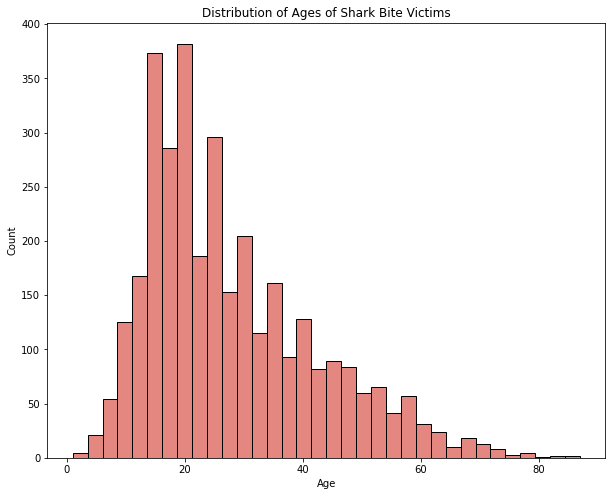

In [10]:
plt.rcParams['figure.figsize']=10,8
sns.histplot(x='Age', data=df).set(title='Distribution of Ages of Shark Bite Victims')

We have a wide range of ages, but it definitely peaks in late 20s. The mean is 28 and the median is 24, so it is right-skewed. I did drop outliers that were not listed numerically (ex, 'Teen'). The range is reasonable as a human life span.

[Text(0.5, 1.0, 'Distribution of Attacks by Year')]

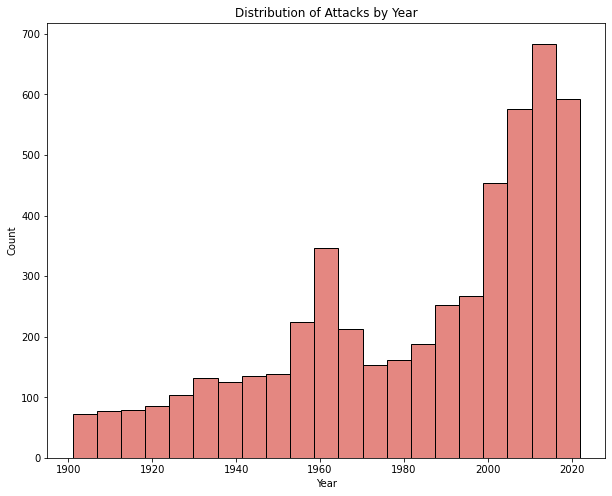

In [11]:
sns.histplot(x='Year', data=df).set(title='Distribution of Attacks by Year')

Looked at 1900 and up, there were earlier dates listed but they seemed like potential errors (1700s), or also just out of a range to be able to compare with anything. We do see that reported attacks have been increasing. The mean is 1982 and the median is 1994, so this graph is left-skewed.

[Text(0.5, 1.0, 'Distribution of Attack Types')]

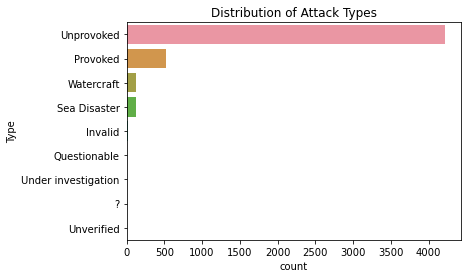

In [15]:
plt.rcParams['figure.figsize']=6,4
sns.countplot(y="Type", data=df, order=df.Type.value_counts().index).set(title='Distribution of Attack Types')

Most attacks are by far unprovoked, there are a few outliers under "unverified" and "under investigation", etc. 

[Text(0.5, 1.0, 'Distribution of Attacks by Activity')]

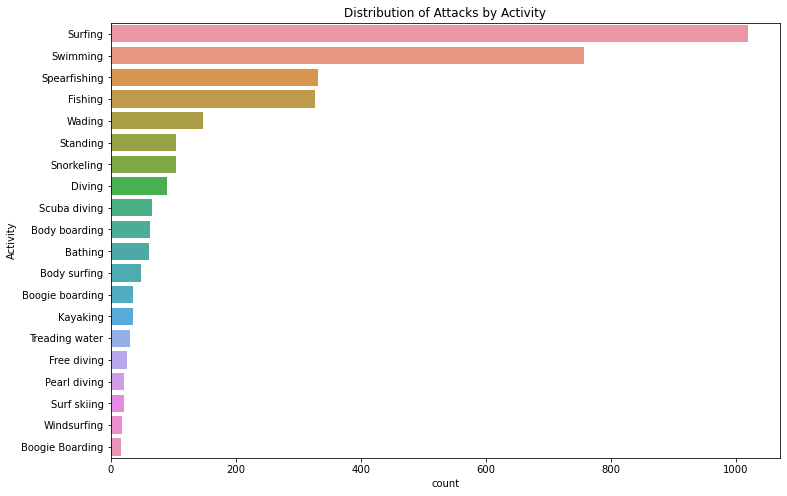

In [16]:
plt.rcParams['figure.figsize']=12,8
sns.countplot(y='Activity', data=df, order=df.Activity.value_counts().iloc[:20].index).set(title="Distribution of Attacks by Activity")

I chose to only include the top 20 activities on this graph. In the data, there are a lot of descriptions of activities, but these seemed to be the most straightforward answers.

In [17]:
df.Species.value_counts()

White shark                         151
Tiger shark                          78
Bull shark                           53
4' shark                             41
6' shark                             38
                                   ... 
said to involve a tiger shark         1
5'shark                               1
Sandtiger shark'                      1
Broadnose sevengill shark, 1.5 m      1
Whaler shark, 4 m [13']               1
Name: Species, Length: 1338, dtype: int64

[Text(0.5, 1.0, 'Distribution of Species')]

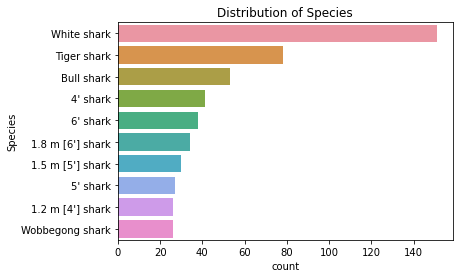

In [18]:
plt.rcParams['figure.figsize']=6,4
sns.countplot(y="Species", data=df, order=df.Species.value_counts().iloc[:10].index).set(title='Distribution of Species')

Sorting by species seems to not be able to work well, due to a lack of consistent answers.

[Text(0.5, 1.0, 'Distribution of Sex of Victims')]

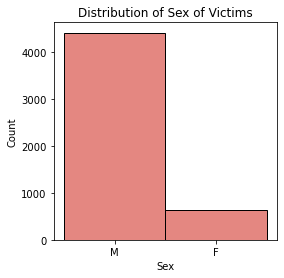

In [20]:
plt.rcParams['figure.figsize']=4,4
sns.histplot(x="Sex", data=df).set(title="Distribution of Sex of Victims")

Overwhelmingly, more men than women are attacked.

[Text(0.5, 1.0, 'Distribution of Fatality of Victims')]

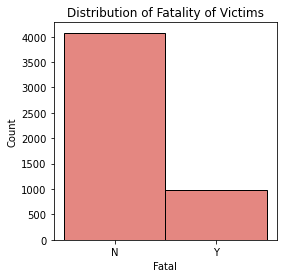

In [21]:
plt.rcParams['figure.figsize']=4,4
sns.histplot(x="Fatal", data=df).set(title="Distribution of Fatality of Victims")

Most attacks are nonfatal.

In [22]:
dfm = df[df['Sex'] =='M']
dff = df[df['Sex'] == 'F']

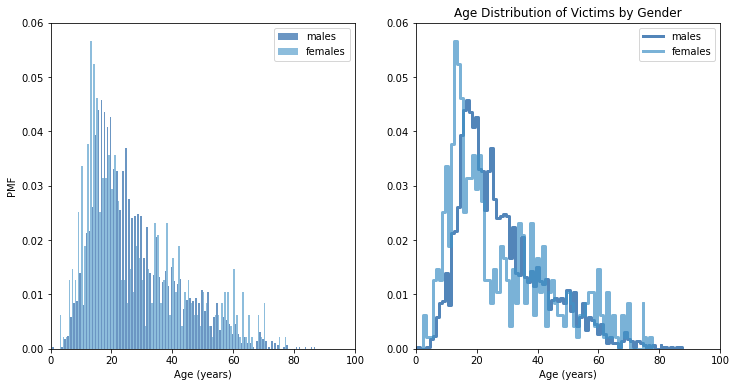

In [23]:
m_pmf = thinkstats2.Pmf(dfm.Age, label="males")
f_pmf = thinkstats2.Pmf(dff.Age, label="females")
width = .5
axis = [0, 100, 0, 0.06]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(m_pmf, align="right", width=width)
thinkplot.Hist(f_pmf, align="left", width=width)
thinkplot.Config(xlabel="Age (years)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([m_pmf, f_pmf])
thinkplot.Config(xlabel="Age (years)", title="Age Distribution of Victims by Gender", axis=axis)

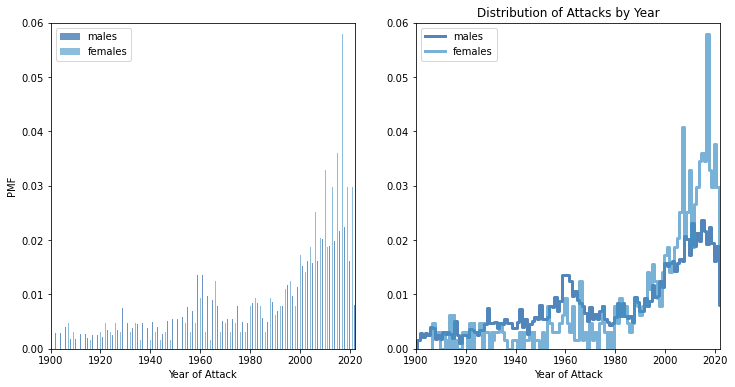

In [24]:
m_pmf = thinkstats2.Pmf(dfm.Year, label="males")
f_pmf = thinkstats2.Pmf(dff.Year, label="females")
width = .2
axis = [1900, 2022, 0, 0.06]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(m_pmf, align="right", width=width)
thinkplot.Hist(f_pmf, align="left", width=width)
thinkplot.Config(xlabel="Year of Attack", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([m_pmf, f_pmf])
thinkplot.Config(xlabel="Year of Attack", title="Distribution of Attacks by Year", axis=axis)

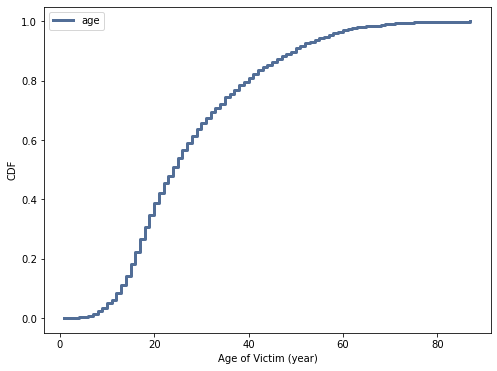

In [27]:
plt.rcParams['figure.figsize']=8,6
cdf = thinkstats2.Cdf(df.Age, label='age')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Age of Victim (year)', ylabel='CDF', loc='upper left')

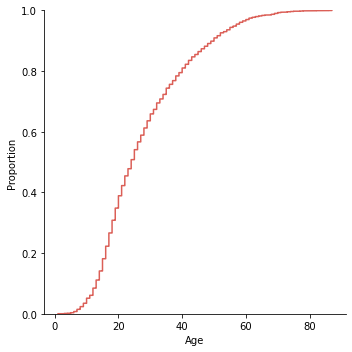

In [35]:
sns.displot(x='Age', data=df, kind='ecdf')

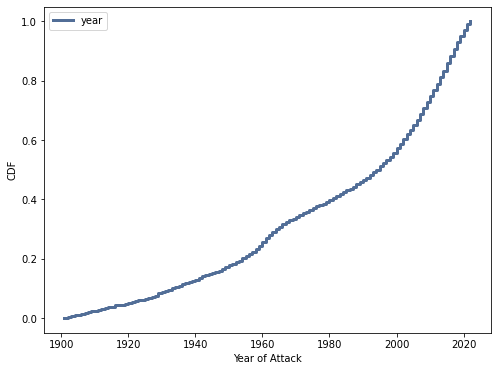

In [28]:
cdf = thinkstats2.Cdf(df.Year, label='year')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Year of Attack', ylabel='CDF', loc='upper left')

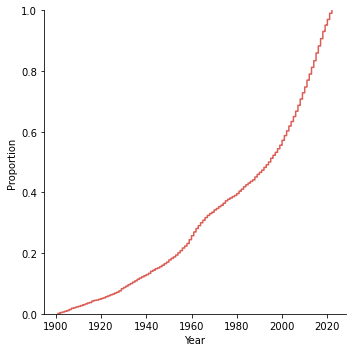

In [33]:
sns.displot(x='Year', data=df, kind='ecdf')

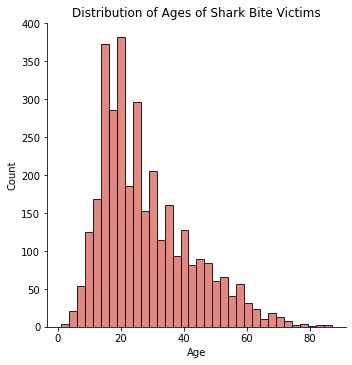

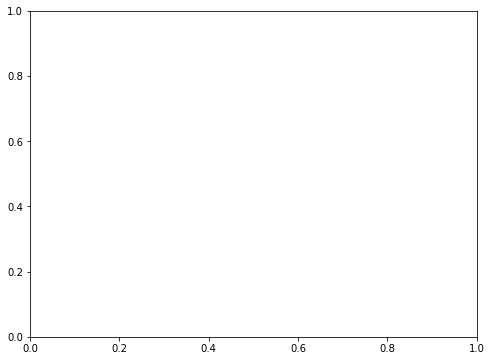

In [62]:
sns.displot(x='Age', data=df).set(title='Distribution of Ages of Shark Bite Victims')
sns.displot()
fig, ax = plt.subplots()


<AxesSubplot:xlabel='Year', ylabel='Age'>

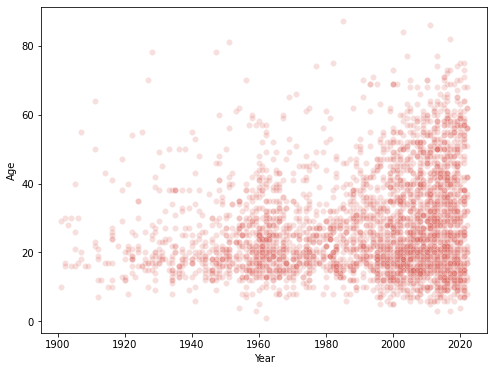

In [72]:
sns.scatterplot(data=df, x='Year', y='Age', alpha=.2)

We can see that over time, 20 is the general age of someone to get hurt by a shark. As time goes on, more older people are being injured. This might be because of extended lifespans, and the ability to be in the water at those ages, due to medical advances. As time goes on, more younger ages are likely to get injured as well. This might be because of expanded access for families to beaches, whether physically or economically. Either way, I think it's more likely that the increase in range of ages is due to accesibility of getting to the water instead of sharks targeting a wider range of people.

Covariance is high and positive, indicating that age of victims tends to increase as the years increase.

In [85]:
yva = df[['Year','Age']].dropna()
scipy.stats.pearsonr(yva['Year'], yva['Age'])

(0.19579729048102512, 2.9956694190079115e-30)

Pearson's coefficient is .1958, showing a weak positive correlation.

<AxesSubplot:xlabel='Age', ylabel='Sex'>

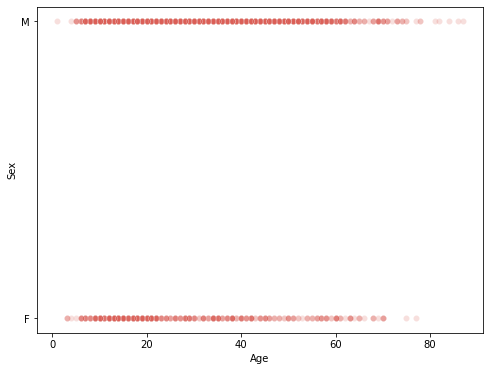

In [75]:
sns.scatterplot(data=df, x='Age', y='Sex', alpha=.2)

Further scatterplot analysis won't work for the other variables I have, because they are boolean or categorical, and not cardinal.

In [88]:
scipy.stats.ttest_ind(dfm['Age'].dropna(), dff['Age'].dropna())

Ttest_indResult(statistic=0.8936210633129316, pvalue=0.3715890179930226)

Comparing effect of gender on age of victims, our p-value is .37, which is much higher than .05 or even .1, so there seems to be no relationship.

In [87]:
dfm['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4421 entries, 0 to 6773
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
2867 non-null   float64
dtypes: float64(1)
memory usage: 69.1 KB


In [90]:
formula = 'Age ~ Year'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     133.2
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.00e-30
Time:                        19:18:51   Log-Likelihood:                -13587.
No. Observations:                3344   AIC:                         2.718e+04
Df Residuals:                    3342   BIC:                         2.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -179.9062     18.005     -9.992      0.000    -215.207    -144.605
Year           0.1044      0.009     11.542      0.000       0.087       0.122
==============================================================================
Omnibus:                      355.002   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.093
Skew:                           0.881   Prob(JB):                    6.84e-104
Kurtosis:                       3.552   Cond. No.                     1.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""